In [49]:
# Import
import pandas as pd
import numpy as np
import hvplot.pandas
import lib
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px

In [50]:
# Read in CSV file in from the resources folder into a Pandas DataFrame
# Set the date as the DateTimeIndex
Strategy_Bollinger_S_Term_Returns = pd.read_csv(
    Path("../data/Strategy_Bollinger_S_Term_Returns.csv"), 
    index_col="Date",
    infer_datetime_format=True, 
    parse_dates=True
    
)

# Review the DataFrame
Strategy_Bollinger_S_Term_Returns.head()

,predicted_signal,actual_returns,strategy_returns,cumulative_Returns
Date,,,,
2017-05-11,0.0,-0.002163,-0.0,0.0
2017-05-12,0.0,-0.001478,-0.0,0.0
2017-05-15,0.0,0.004776,0.0,0.0
2017-05-16,0.0,-0.000687,-0.0,0.0
2017-05-17,0.0,-0.018178,-0.0,0.0


In [51]:
Strategy_Bollinger_S_Term_Metrics = pd.read_csv(
    Path("../data/Strategy_Bollinger_S_Term_Metrics.csv"), 
    index_col=0,
    
)

# Review the DataFrame
Strategy_Bollinger_S_Term_Metrics.head()

,Strategy_Bollinger_S_Term
Annualized Return,0.035864
Cumulative Returns,0.105172
Annual Volatility,1.236514
Sharpe Ratio,0.201926
Sortino Ratio,0.277673


In [52]:

Strategy_Bollinger_L_Term_Metrics = pd.read_csv(
    Path("../data/Strategy_Bollinger_L_Term_Metrics.csv"), 
    index_col=0,
    
)

# Review the DataFrame
Strategy_Bollinger_L_Term_Metrics.head()

,Strategy_Bollinger_L_Term
Annualized Return,0.015818
Cumulative Returns,-0.009339
Annual Volatility,2.137405
Sharpe Ratio,0.087436
Sortino Ratio,0.120971


In [53]:
Strategy_Bollinger_L_Term_Returns = pd.read_csv(
    Path("../data/Strategy_Bollinger_L_Term_Returns.csv"), 
    index_col="Date",
    infer_datetime_format=True, 
    parse_dates=True
    
)

# Review the DataFrame
Strategy_Bollinger_L_Term_Returns.head()

,predicted_signal,actual_returns,strategy_returns,cumulative_Returns
Date,,,,
2006-07-03,0.0,0.007865,0.0,0.0
2006-07-05,0.0,-0.007249,-0.0,0.0
2006-07-06,0.0,0.002494,0.0,0.0
2006-07-07,0.0,-0.006750,-0.0,0.0
2006-07-10,0.0,0.001470,0.0,0.0


In [54]:
Strategy_LR_L_Term_Returns = pd.read_csv(
    Path("../data/Strategy_LR_L_Term_Returns.csv"), 
    index_col="Date",
    infer_datetime_format=True, 
    parse_dates=True
    
)

# Review the DataFrame
Strategy_LR_L_Term_Returns.head()

,predicted_signal,actual_returns,strategy_returns,cumulative_Returns
Date,,,,
2006-09-13,1.0,0.003861,0.003861,0.003861
2006-09-14,1.0,-0.001358,-0.001358,0.002498
2006-09-15,1.0,0.002568,0.002568,0.005072
2006-09-18,1.0,0.001152,0.001152,0.006230
2006-09-19,1.0,-0.002679,-0.002679,0.003534


In [55]:
Strategy_LR_S_Term_Returns = pd.read_csv(
    Path("../data/Strategy_LR_S_Term_Returns.csv"), 
    index_col="Date",
    infer_datetime_format=True, 
    parse_dates=True
    
)

# Review the DataFrame
Strategy_LR_S_Term_Returns.head()

,predicted_signal,actual_returns,strategy_returns,cumulative_Returns
Date,,,,
2017-05-11,-1.0,-0.002163,0.002163,0.002163
2017-05-12,-1.0,-0.001478,0.001478,0.003644
2017-05-15,-1.0,0.004776,-0.004776,-0.001149
2017-05-16,-1.0,-0.000687,0.000687,-0.000463
2017-05-17,-1.0,-0.018178,0.018178,0.017706


In [56]:

Strategy_LR_L_Term_Metrics = pd.read_csv(
    Path("../data/Strategy_LR_L_Term_Metrics.csv"), 
    index_col=0,
    
)

# Review the DataFrame
Strategy_LR_L_Term_Metrics.head()

,Strategy_LR_L_Term
Annualized Return,0.118088
Cumulative Returns,3.594157
Annual Volatility,18.543520
Sharpe Ratio,0.582458
Sortino Ratio,0.813818


In [57]:
Strategy_LR_S_Term_Metrics = pd.read_csv(
    Path("../data/Strategy_LR_S_Term_Metrics.csv"), 
    index_col=0,
    
)

# Review the DataFrame
Strategy_LR_S_Term_Metrics.head()

,Strategy_LR_S_Term
Annualized Return,-0.119385
Cumulative Returns,-0.502544
Annual Volatility,2.867556
Sharpe Ratio,-0.592263
Sortino Ratio,-0.867985


In [58]:
def strategy_dd (title, strategy1,strategy1_label, strategy2 ,strategy2_label): # drawdown
    fig = plt.figure(constrained_layout=True, figsize=(12,5)) 
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(strategy1["cumulative_Returns"], label =strategy1_label)
    ax.plot(strategy2["cumulative_Returns"], label =strategy2_label)
    ax.set(xlabel = "Year",
    ylabel = "Drawdown Percent",title = title)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.legend()
    plt.close(fig)
    return fig

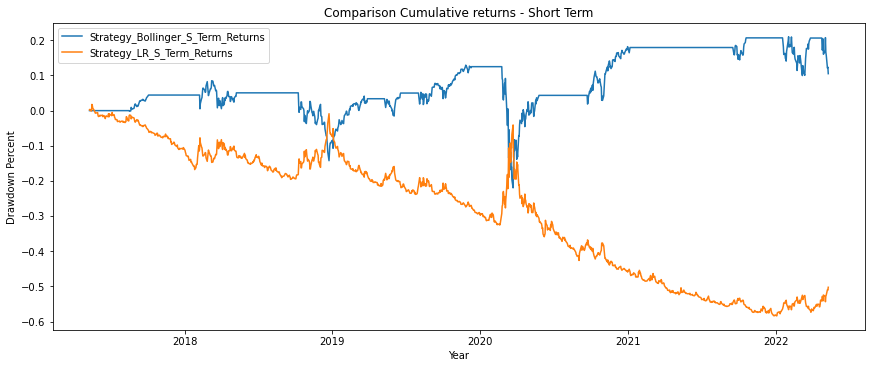

In [59]:
strategies_dd = strategy_dd("Comparison Cumulative returns - Short Term", 
                            Strategy_Bollinger_S_Term_Returns, "Strategy_Bollinger_S_Term_Returns",
                            Strategy_LR_S_Term_Returns, "Strategy_LR_S_Term_Returns" )
strategies_dd

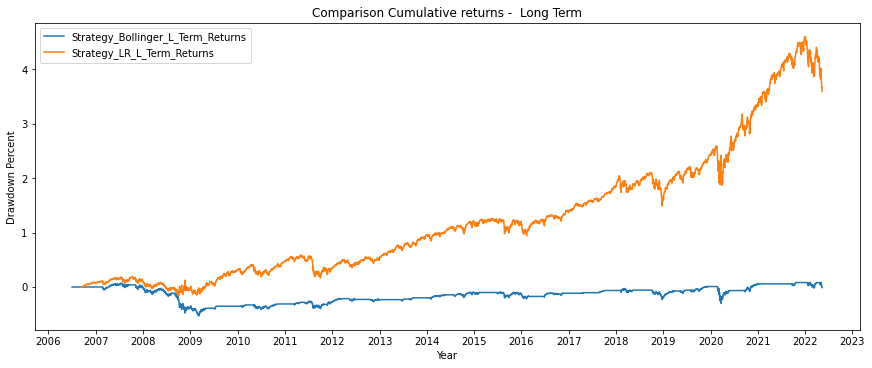

In [60]:
strategies_dd = strategy_dd("Comparison Cumulative returns -  Long Term", 
                            Strategy_Bollinger_L_Term_Returns, "Strategy_Bollinger_L_Term_Returns",
                            Strategy_LR_L_Term_Returns, "Strategy_LR_L_Term_Returns" )
strategies_dd

In [65]:
metric_df = Strategy_Bollinger_S_Term_Metrics.copy()
metric_df["Strategy_LR_S_Term"]= Strategy_LR_S_Term_Metrics["Strategy_LR_S_Term"]
metric_df["Strategy_LR_L_Term"]= Strategy_LR_L_Term_Metrics["Strategy_LR_L_Term"]
metric_df["Strategy_Bollinger_L_Term"]= Strategy_Bollinger_L_Term_Metrics["Strategy_Bollinger_L_Term"]
metric_df

,Strategy_Bollinger_S_Term,Strategy_LR_S_Term,Strategy_LR_L_Term,Strategy_Bollinger_L_Term
Annualized Return,0.035864,-0.119385,0.118088,0.015818
Cumulative Returns,0.105172,-0.502544,3.594157,-0.009339
Annual Volatility,1.236514,2.867556,18.543520,2.137405
Sharpe Ratio,0.201926,-0.592263,0.582458,0.087436
Sortino Ratio,0.277673,-0.867985,0.813818,0.120971


In [66]:
metric_df = metric_df.T
metric_df

,Annualized Return,Cumulative Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio
Strategy_Bollinger_S_Term,0.035864,0.105172,1.236514,0.201926,0.277673
Strategy_LR_S_Term,-0.119385,-0.502544,2.867556,-0.592263,-0.867985
Strategy_LR_L_Term,0.118088,3.594157,18.543520,0.582458,0.813818
Strategy_Bollinger_L_Term,0.015818,-0.009339,2.137405,0.087436,0.120971


In [108]:
metric_df.hvplot(kind='barh', height=700, width=1250, legend='bottom_right')


:Bars   [index,Variable]   (value)